# Importing Matplotlib and Pandas

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# **Read Dataset: .csv/.xlsx to DataFrame**

In [83]:
dataset = pd.read_csv('./diabetes_prediction_dataset.csv')
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **Dataset Analysis**

- shape
- columns
- head()
- sample()
- describe()
- finding categorical features
- checking if any null/nan values
- filtering data instances based on indices
- filtering data instances based on conditional statements


In [11]:
dataset.shape

(100000, 9)

In [9]:
# checking the features of the dataset
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [10]:
# picking a random data
dataset.sample()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
69460,Female,51.0,0,0,never,29.79,5.7,140,0


In [12]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [14]:
### finding categorical features
categorical_features = [feature for feature in dataset.columns if len(dataset[feature].unique())<25]
categorical_features

['gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [15]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [17]:
# filtering data instances based on indices
dataset.iloc[0:5, 0:3]

,gender,age,hypertension
0,Female,80.0,0
1,Female,54.0,0
2,Male,28.0,0
3,Female,36.0,0
4,Male,76.0,1


In [18]:
# filtering data instances based on conditional statements
dataset[dataset['age'] > 50]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
10,Female,53.0,0,0,never,27.32,6.1,85,0
...,...,...,...,...,...,...,...,...,...
99984,Male,80.0,1,0,No Info,20.96,6.6,85,0
99986,Female,63.0,0,0,never,29.01,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0


# **Dataset Visualization**

- Dataset biased or not
- Histogram
- Scatter Plot
- Bar chart
- etc.

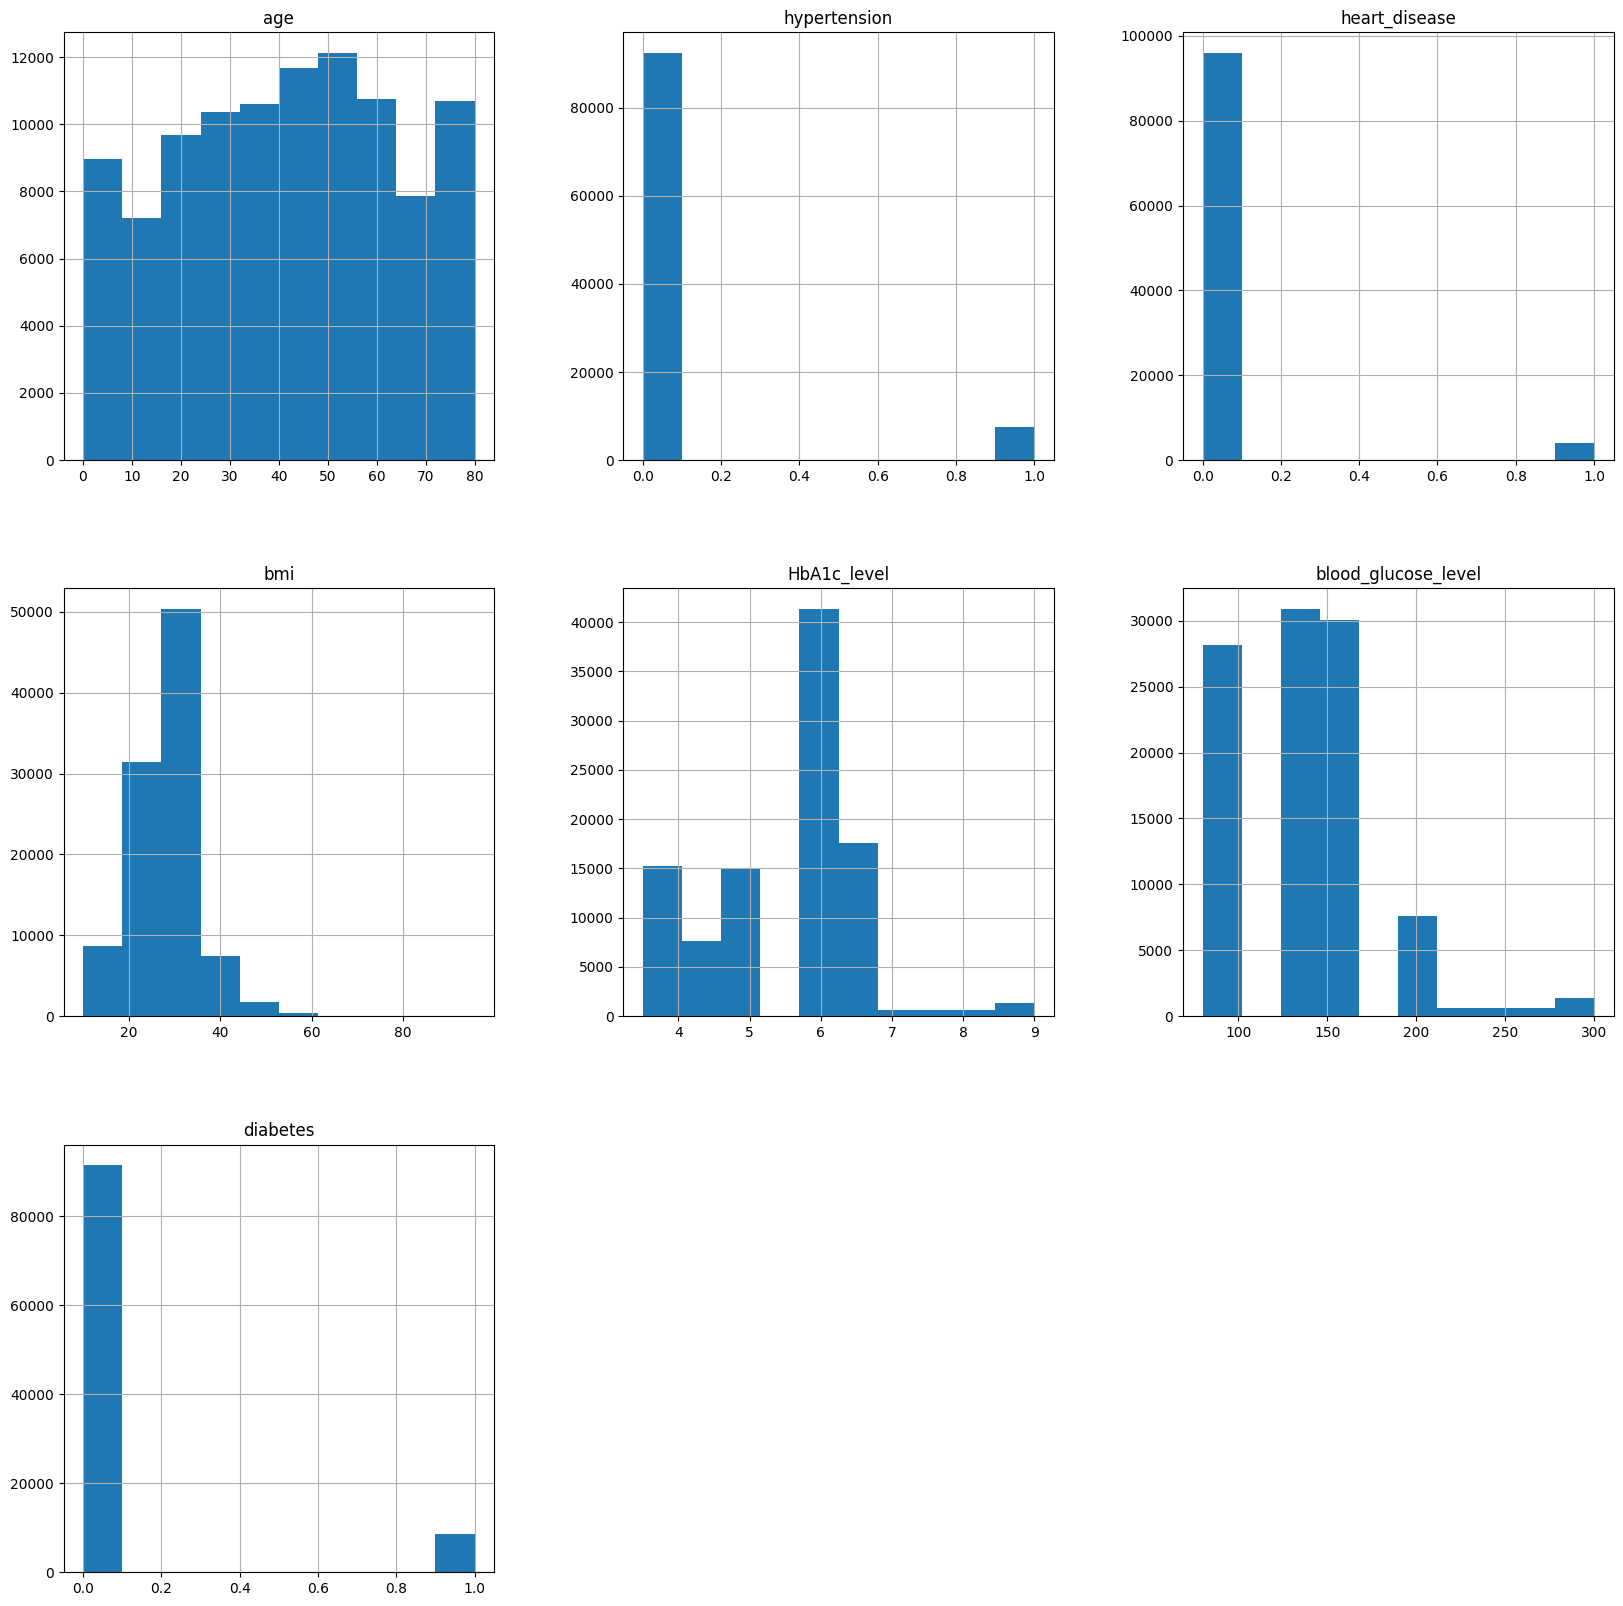

In [24]:
## creating histograms for each of the features
dataset.hist(figsize=(20,20))
plt.show()


<Axes: xlabel='age', ylabel='diabetes'>

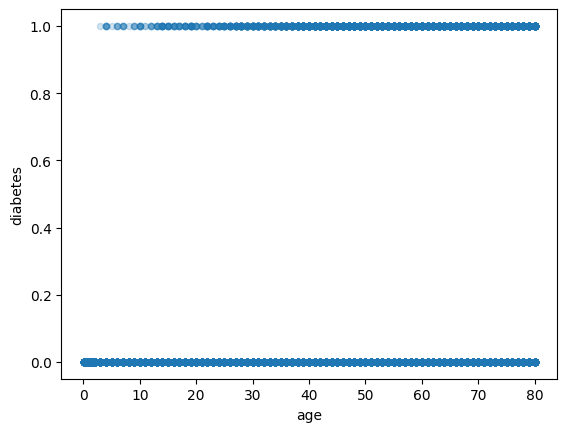

In [26]:
# creating scatter plot
dataset.plot(kind='scatter', x='age', y='diabetes', alpha=0.2)

<Axes: xlabel='diabetes'>

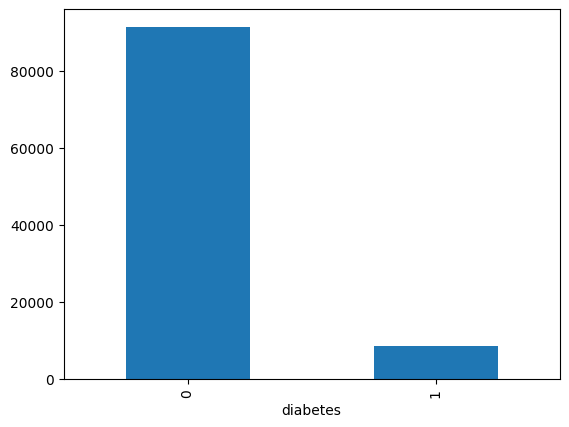

In [29]:
# creating bar chart 
dataset['diabetes'].value_counts().plot(kind='bar')



<Axes: >

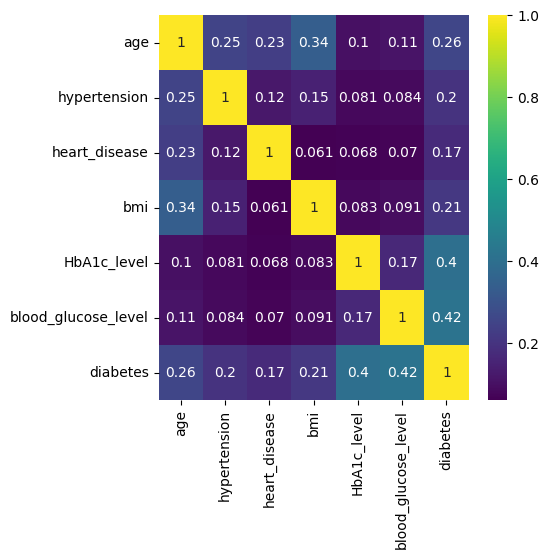

In [124]:
# using sns to generate a heatmap
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(dataset.corr(), annot=True, cmap='viridis')

# **Dataset Pre-processing**

- Null/NaN values handling

    a) Delete Rows

    b) Delete Columns

    c) Impute Values

- Encoding Categorical Features

- Feature Scaling

In [84]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [85]:
# label encoding smoking_history and gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['smoking_history'] = le.fit_transform(dataset['smoking_history'])
dataset['gender'] = le.fit_transform(dataset['gender'])

In [111]:
dataset.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [89]:
## feature scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(dataset.drop('diabetes',axis=1)).transform(dataset.drop('diabetes',axis=1))
dataset_scaled = pd.DataFrame(scaled, columns=dataset.columns[:-1])
dataset_scaled.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183


In [92]:
x = dataset_scaled
y = dataset['diabetes']

# **Feature Selection**

In [87]:
# no features were omitted since all the features are required
dataset = dataset.drop(["gender","smoking_history"],axis=1)


# **Dataset Splitting**

- Training Set

- Testing Set

In [94]:
# splitting the dataset into training and testing set
# splitting as 80% training and 20% testing
# Split data in to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Dataset Training**

Classification Problem

- SVM

- Decision Tree

- K-nearest Neighbors

- Logistic Regression

Regression Problem
- https://www.upgrad.com/blog/types-of-regression-models-in-machine-learning/

In [104]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
svc_result = accuracy_score(y_test, y_pred)
print('Model accuracy : {0:0.3f}'. format(svc_result))


Model accuracy : 0.963


In [105]:
# apply logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
logreg_result = accuracy_score(y_test, y_pred)
print('Model accuracy : {0:0.3f}'. format(logreg_result))

Model accuracy : 0.959


In [106]:
# apply knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_result = accuracy_score(y_test, y_pred)
print('Model accuracy : {0:0.3f}'. format(knn_result))

Model accuracy : 0.967


In [107]:
# apply decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
dt_result = accuracy_score(y_test, y_pred)
print('Model accuracy : {0:0.3f}'. format(dt_result))

Model accuracy : 0.956


# **Dataset Testing with the unseen x_data**

In [123]:
# testing the model by predicting the diabetes of a person

# creating a function to predict diabetes
# set the values from dataset

def predict_diabetes(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level):
    x = [[age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level]]
    x = scaler.transform(x)
    return svc.predict(x)

# @params-> {age, hypertension, heart_disease, bmi, hbA1c_level, blood_glucose_level}

predict_diabetes(53, 1, 1, 23.6, 3.6, 125)

## 0 -> no diabetes
## 1 -> diabetes


c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# **Result analysis of used models**

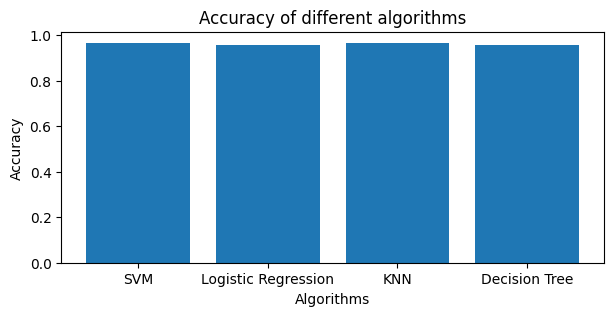

In [109]:
# plotting the results
plt.figure(figsize=(7,3))
plt.bar(['SVM', 'Logistic Regression', 'KNN', 'Decision Tree'], [svc_result, logreg_result, knn_result, dt_result])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of different algorithms')
plt.show()


# **Summary of the project**

We have used a dataset on diabetes prediction which has 38,463 patient data.

From data visualization, we see that diabetes is quite connected to HbA1c_level and blood glucose level with average connection towards age, hypertension, bmi.

We have used label encoding for smoking history and gender since these are textual data and cannot be processed, we have encoded these to numerical data.

For feature scalling, we have used StandardScaler and used all the features except the last one for 'x' and the last one, "diabetes" which is our target feature for prediction.

But it was clear that gender and smoking history was not impacting the whole prediciton, we dropped gender and smoking history.

We splited the data as 80% training and 20% testing.

For accuracy,
SVM Model accuracy : 0.963
logistic regression Model accuracy : 0.959
k-nearest neighbour Model accuracy : 0.967
Decision tree Model accuracy : 0.956